In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
import gravis as gv

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
Relations = pd.read_csv('R_M_relations.csv')
display(Relations)

,src,dest
0,Rick Sanchez,Beth Sanchez
1,Rick Sanchez,Diane Sanchez
2,Rick Sanchez,Beth Smith (Cronenberged dimension)
3,Rick Sanchez,Space Beth
4,Rick Sanchez,Jerry Smith (Cronenberged dimension)
...,...,...
705,Morty Smith (Jerry's original dimension),Jerry Smith (C-131)
706,Morty Smith (Jerry's original dimension),Beth Smith
707,Morty Smith (Jerry's original dimension),Summer Smith
708,Morty Smith (Jerry's original dimension),Rick Sanchez


In [230]:
Species = pd.read_csv('R_M_species.csv').drop_duplicates(ignore_index=True)
display(Species)

,name,species
0,Rick Sanchez,Human
1,Morty Smith,Human
2,Summer Smith,Human
3,Beth Sanchez,Human
4,Jerry Smith Prime,Human
...,...,...
624,Night Summer,Human
625,Rhett Caan,Other
626,Jessica (Cronenberged Dimension),Human
627,Mr. Stringbean,Alien


In [231]:
node_colors = {'Alien':'#ACF127',
'Animal':'#316759',
'Clone':'#BEA968',
'Droid':'#425B77',
'Human':'#63CBFB',
'Human-Animal':'#F5F242',
'Mythological':'#14316A',
'Other':'#F9B798',
'Robot':'#BDBDBD',
'Unknown':'#392C21'
}
Species['color']=Species['species'].map(node_colors)

In [232]:
graph = nx.from_pandas_edgelist(Relations, source = 'src', target = 'dest')

In [234]:
attr=Species.to_dict(orient='index')
nodes_attr={}
for node,elem in attr.items():
    nodes_attr[elem['name']] = {'species':elem['species'],'color':elem['color']}
nx.set_node_attributes(graph,nodes_attr)

In [37]:
print(nx.info(graph))

Graph with 262 nodes and 520 edges


C:\Users\mgale\AppData\Local\Temp\ipykernel_35692\3581210431.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


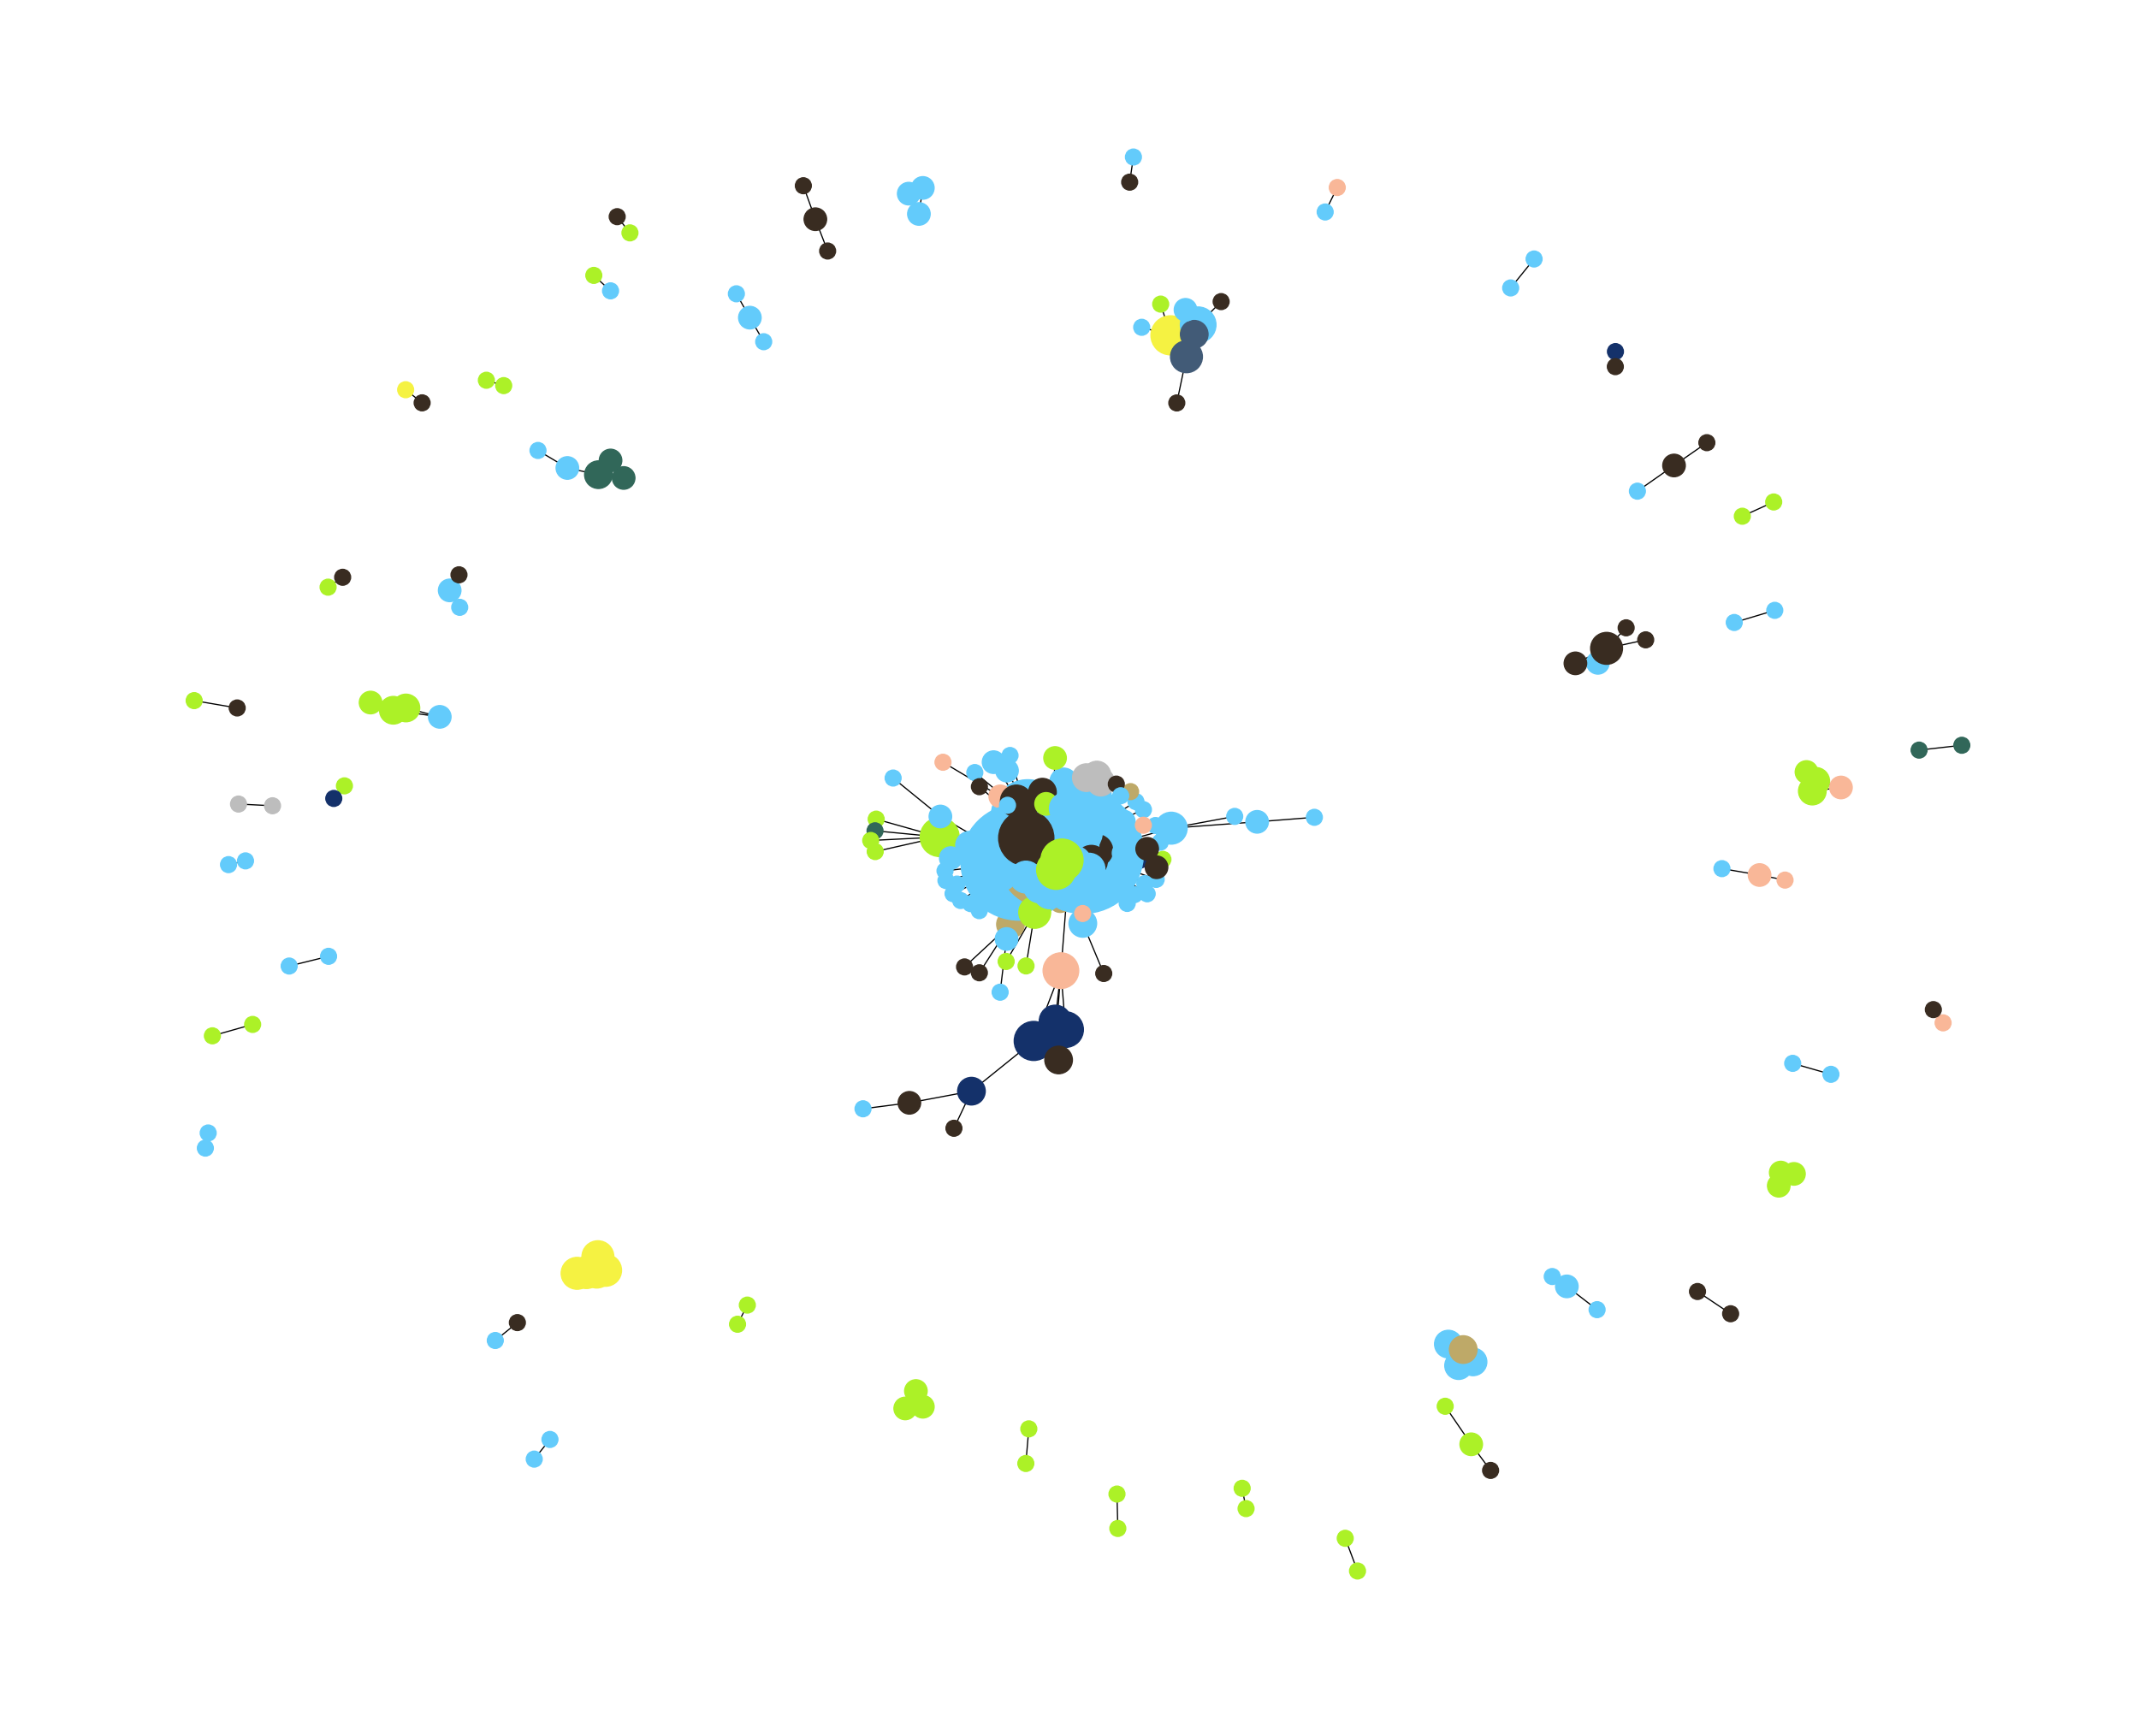

In [236]:
pos=nx.spring_layout(graph)
plt.figure(figsize=(25,20))
nCol=nx.get_node_attributes(graph,'color')
for n in graph.nodes:
    if not n in nCol:
        nCol[n]='#392C21'
d = dict(graph.degree)
nx.draw(graph, pos, node_color=[nCol[n] for n in graph.nodes],node_size=[v * 180 for v in d.values()])
#edge_labels = nx.get_edge_attributes(graph, "weight")
#nx.draw_networkx_edge_labels(graph, pos, edge_labels)
#nx.draw_networkx_labels(graph, pos,font_size=12, font_color="black")
plt.show()

In [237]:
gv.d3(graph)
